In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch

from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen

import requests

import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import soccerdata as sd
from matplotlib.lines import Line2D
import soccerdata as sd
from matplotlib.colors import to_rgba

pd.set_option('display.max_columns', None)

[11/14/24 16:03:07] INFO     No custom team name replacements found. You can configure these in       ]8;id=933412;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=117880;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py#87\87]8;;\
                             C:\Users\acer\soccerdata\config\teamname_replacements.json.                           

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=958692;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=59076;file://C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerdata\_config.py#177\177]8;;\
                             C:\Users\acer\soccerdata\config\league_dict.json.                                     

In [100]:
def plot_shotmap(df,team,teamcolor):
    df = df[df['teamName'] == team]
    total_shots = df.shape[0]
    total_goals = df[df['eventType'] == 'Goal'].shape[0]
    total_xG = df['expectedGoals'].sum()
    xG_per_shot = total_xG / total_shots
    points_average_distance = df['x'].mean()
    actual_average_distance = 120 - (df['x'] * 1.2).mean()
    
    pitch = VerticalPitch(
    pitch_type='uefa', 
    half=True, 
    pitch_color=background, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(10, 12))
    fig.patch.set_facecolor(background)


    # Top row for the team names and score
    # [left, bottom, width, height]

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.5, 
        y=.85, 
        s=team, 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color=teamcolor, 
        ha='center'
    )
    ax1.text(
        x=0.5, 
        y=.7, 
        s=f'All shots in the Premier League 2024-25', 
        fontsize=14,
        fontweight='bold',
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )
    ax1.text(
        x=0.25, 
        y=0.5, 
        s=f'Low Quality Chance', 
        fontsize=12, 
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )

    # add a scatter point between the two texts
    ax1.scatter(
        x=0.37, 
        y=0.53, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.42, 
        y=0.53, 
        s=200, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.48, 
        y=0.53, 
        s=300, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.54, 
        y=0.53, 
        s=400, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )
    ax1.scatter(
        x=0.6, 
        y=0.53, 
        s=500, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.75, 
        y=0.5, 
        s=f'High Quality Chance', 
        fontsize=12, 
        fontproperties=font_props, 
        color='white', 
        ha='center'
    )


    ax1.text(
        x=0.45, 
        y=0.27, 
        s=f'Goal', 
        fontsize=10, 
        fontproperties=font_props, 
        color='white', 
        ha='right'
    )
    ax1.scatter(
        x=0.47, 
        y=0.3, 
        s=100, 
        color=teamcolor, 
        edgecolor='white', 
        linewidth=.8,
        alpha=.7
    )


    ax1.scatter(
        x=0.53, 
        y=0.3, 
        s=100, 
        color=background, 
        edgecolor='white', 
        linewidth=.8
    )

    ax1.text(
        x=0.55, 
        y=0.27, 
        s=f'No Goal', 
        fontsize=10, 
        fontproperties=font_props, 
        color='white', 
        ha='left'
    )

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)


    # create a scatter plot at y 100 - average_distance
    ax2.scatter(
        x=60, 
        y=points_average_distance, 
        s=100, 
        color='white',  
        linewidth=.8
    )
    # create a line from the bottom of the pitch to the scatter point
    ax2.plot(
        [60, 60], 
        [105, points_average_distance], 
        color='white', 
        linewidth=2
    )

    # Add a text label for the average distance
    ax2.text(
        x=60, 
        y=points_average_distance - 4, 
        s=f'Average Distance\n{actual_average_distance:.1f} yards', 
        fontsize=10, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='center'
    )


    for x in df.to_dict(orient='records'):
        pitch.scatter(
            x['x'], 
            x['y'], 
            s=400 * x['expectedGoals'], 
            color=teamcolor if x['eventType'] == 'Goal' else background, 
            ax=ax2,
            alpha=.7,
            linewidth=.8,
            edgecolor='white'
        )
        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, .2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.25, 
        y=.5, 
        s='Shots', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.25, 
        y=0, 
        s=f'{total_shots}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=.5, 
        s='Goals', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.38, 
        y=0, 
        s=f'{total_goals}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=.5, 
        s='xG', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.53, 
        y=0, 
        s=f'{total_xG:.2f}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=.5, 
        s='xG/Shot', 
        fontsize=20, 
        fontproperties=font_props, 
        fontweight='bold', 
        color='white', 
        ha='left'
    )

    ax3.text(
        x=0.63, 
        y=0, 
        s=f'{xG_per_shot:.2f}', 
        fontsize=16, 
        fontproperties=font_props, 
        color=teamcolor, 
        ha='left'
    )

    ax3.set_axis_off()

    return fig

In [55]:
df['teamName'].unique()

array(['Fulham', 'Man Utd', 'Ipswich Town', 'Liverpool', 'Wolves',
       'Arsenal', 'Everton', 'Brighton', 'Southampton', 'Newcastle',
       'Bournemouth', 'Nottingham Forest', 'West Ham', 'Aston Villa',
       'Crystal Palace', 'Brentford', 'Man City', 'Chelsea', 'Tottenham',
       'Leicester City'], dtype=object)

In [91]:
import pandas as pd

from mplsoccer import VerticalPitch,Pitch
import matplotlib.font_manager as font_manager


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.font_manager as fm
from mplsoccer import FontManager
import matplotlib.image as mpimg
import matplotlib.patches as patches
import soccerdata as sd
from unidecode import unidecode

font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'
font_props = fm.FontProperties(fname=font_path)
fm_sora = FontManager()

background='#0C0D0E'

df = pd.read_csv('C:/Users/acer/Documents/GitHub/IndianCitizen/StreamLit/Data/PL/2024-25/premier_league_2024-25_shot_data.csv')
team='Arsenal'
teamcolor = df[df['teamName'] == team]['teamColor'].unique()[0]

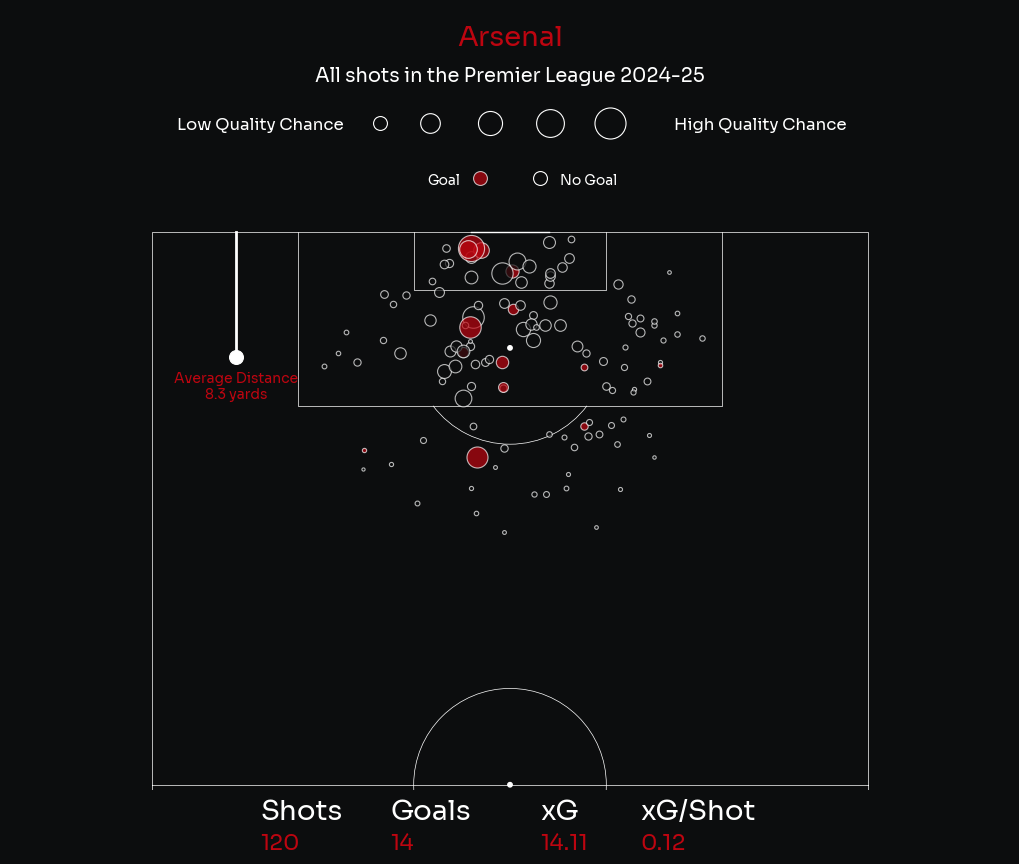

In [101]:
df_team = df[df['teamName'] == team]
plot_shotmap(df_team, team,teamcolor)

## FotMob - ShotData

In [ ]:
params = {'matchId': mi}
        response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)

In [3]:
# Define the function to scrape shot data for a given matchId
def scrape_shots(mi):
    try: 
        params = {'matchId': mi}
        response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)
        data = response.json()
        shotmap = data['content']['shotmap']['shots']
        shots_df = pd.DataFrame(shotmap)
        shots_df['matchId'] = mi
        return shots_df
    except Exception as e:
        print("Data not able to be scraped for MatchID : ",mi)

# Read the CSV containing the team names according to their respective Fotmob teamId
df_teamNameId = pd.read_csv("C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/PL/2024-25/pl_team_name_and_id.csv")
#df_teamNameId = pd.read_csv("C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/Liga-Portugal/por_team_name_and_id.csv")
#df_teamNameId = pd.read_csv("C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/LaLiga/2024-25/la_liga_teams_name_and_id.csv")


# Define your list of matchIds (mi)
first_matchId_pl = 4506263
#first_matchId_liga = 4506745
last_matchId = 4506482

# Initialize an empty list to store individual DataFrames
all_shots_dfs = []

# Loop through each matchId, scrape the shots data, merge with team names, and append to the list
for fotmob_matchId in range(first_matchId_pl,last_matchId+1):
    #print(fotmob_matchId)
    try:
        shots_df = scrape_shots(fotmob_matchId)
        if shots_df is not None:
            shots_df = shots_df.merge(df_teamNameId[['teamId', 'teamName']], on='teamId', how='left')
        
            # Adding the opposition team name column
            team1 = shots_df['teamName'].unique()[0]
            team2 = shots_df['teamName'].unique()[1]
            
            def get_opposite_teamName(team):
                if team == team1:
                    return team2
                elif team == team2:
                    return team1
                else:
                    return None
        
            # Apply the function to create the new column
            shots_df['oppositeTeam'] = shots_df['teamName'].apply(get_opposite_teamName)
            
            # Append the DataFrame to the list
            all_shots_dfs.append(shots_df)
    except Exception as e:
        print(e)

# Concatenate all DataFrames in the list into a single DataFrame
final_shots_df = pd.concat(all_shots_dfs, ignore_index=True)

Data not able to be scraped for MatchID :  4506263
Data not able to be scraped for MatchID :  4506264
Data not able to be scraped for MatchID :  4506265
Data not able to be scraped for MatchID :  4506266
Data not able to be scraped for MatchID :  4506267
Data not able to be scraped for MatchID :  4506268
Data not able to be scraped for MatchID :  4506269
Data not able to be scraped for MatchID :  4506270
Data not able to be scraped for MatchID :  4506271
Data not able to be scraped for MatchID :  4506272
Data not able to be scraped for MatchID :  4506273
Data not able to be scraped for MatchID :  4506274
Data not able to be scraped for MatchID :  4506275
Data not able to be scraped for MatchID :  4506276
Data not able to be scraped for MatchID :  4506277
Data not able to be scraped for MatchID :  4506278
Data not able to be scraped for MatchID :  4506279
Data not able to be scraped for MatchID :  4506280
Data not able to be scraped for MatchID :  4506281
Data not able to be scraped for

KeyboardInterrupt: 

In [9]:
#final_shots_df.to_csv('C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/LaLiga/2024-25/la_liga_2024-25_shot_data.csv',index=False)
final_shots_df.to_csv('C:/Users/acer/Documents/GitHub/IndianCitizen/Streamlit/Data/PL/2024-25/premier_league_2024-25_shot_data.csv',index=False)